
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pycountry_convert as pc

In [2]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [3]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [5]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

count  unique  \
Nationality           111733     199   
Age                   107561     NaN   
DaysSinceCreation     111733     NaN   
NameHash              111733  107584   
DocIDHash             110732  103480   
AverageLeadTime       111733     NaN   
LodgingRevenue        111733     NaN   
OtherRevenue          111733     NaN   
BookingsCanceled      111733     NaN   
BookingsNoShowed      111733     NaN   
BookingsCheckedIn     111733     NaN   
PersonsNights         111733     NaN   
RoomNights            111733     NaN   
DistributionChannel   111733       4   
MarketSegment         111733       7   
SRHighFloor           111733     NaN   
SRLowFloor            111733     NaN   
SRAccessibleRoom      111733     NaN   
SRMediumFloor         111733     NaN   
SRBathtub             111733     NaN   
SRShower              111733     NaN   
SRCrib                111733     NaN   
SRKingSizeBed         111733     NaN   
SRTwinBed             111733     NaN   
SRNearElevator        111733     NaN   
SRAwayFromElevator    111733     NaN   
SRNoAlcoholInMiniBar  111733     NaN   
SRQuietRoom           111733     NaN   

                                                                    top  \
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
DocIDHash             0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq         mean        std  min  25%  50%    75%  \
Nationality           16516          NaN        NaN  NaN  NaN  NaN    NaN   
Age                     NaN      45.6392     17.245  -10   33   47     58   
DaysSinceCreation       NaN      595.027    374.657   36  288  522    889   
NameHash                 75          NaN        NaN  NaN  NaN  NaN    NaN   
DocIDHash              3032          NaN        NaN  NaN  NaN  NaN    NaN   
AverageLeadTime         NaN      60.8331    85.1153   -1    0   21     95   
LodgingRevenue          NaN      283.851    379.132    0    0  208  393.3   
OtherRevenue            NaN      64.6828    123.581    0    0   31    

In [6]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [7]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

MarketSegment
Other                          63680
Direct                         16363
Travel Agent/Operator          16353
Groups                         11461
Corporate                       2931
Complementary                    657
Aviation                         288

In [8]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

DistributionChannel
Travel Agent/Operator                91019
Direct                               16883
Corporate                             3135
GDS Systems                            696

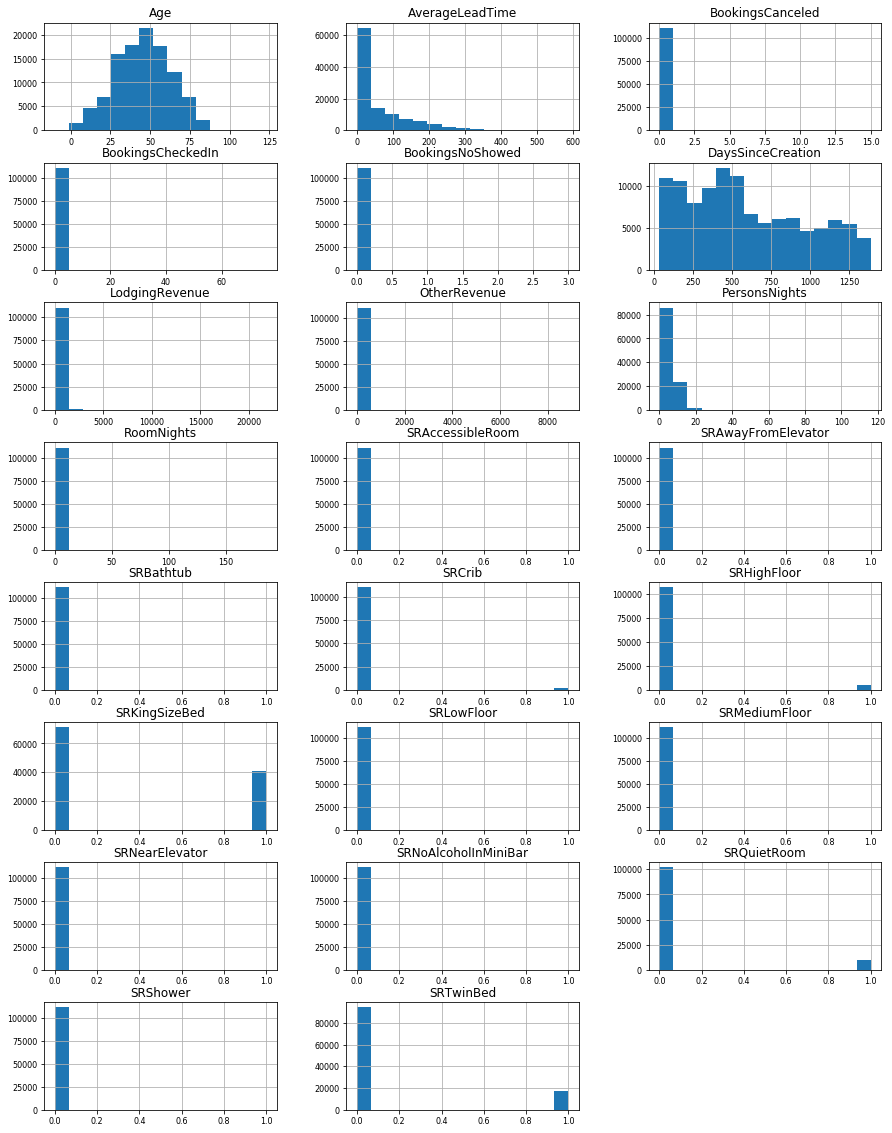

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

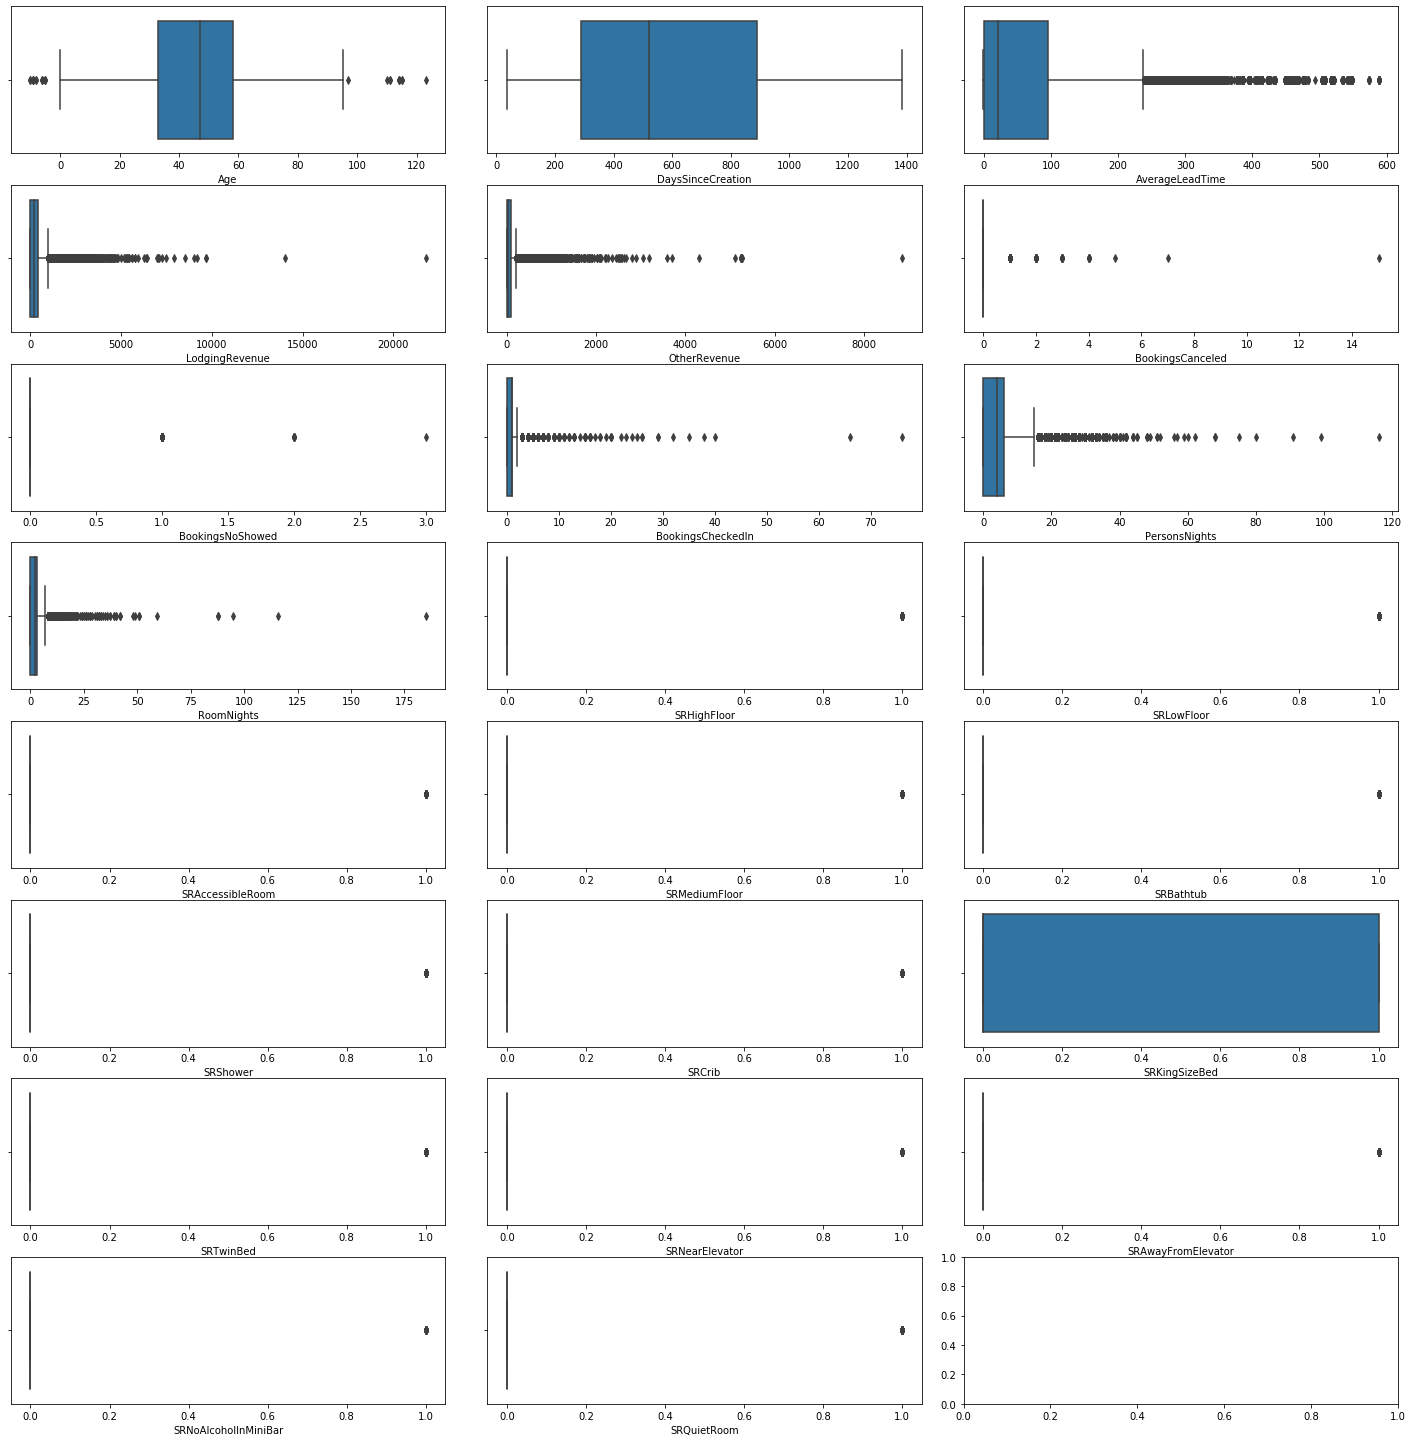

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

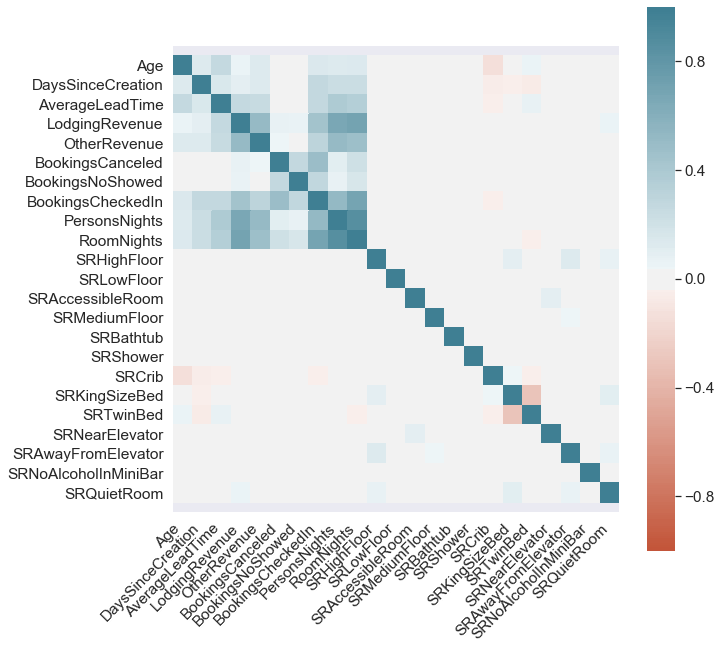

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

Nationality   Age  DaysSinceCreation  \
ID                                            
3              DEU  32.0               1385   
5              FRA  52.0               1385   
7              JPN  50.0               1385   
9              FRA  43.0               1385   
11             IRL  28.0               1385   
13             FRA  57.0               1385   
15             ESP  58.0               1385   
18             FRA  72.0               1385   
20             FRA  27.0               1385   
23             NLD  53.0               1385   
25             FRA  37.0               1385   
28             FRA  66.0               1385   
33             PRT  42.0               1385   
35             PRT   4.0               1385   
36             PRT  64.0               1385   
38             DEU  29.0               1385   
42             ITA  19.0               1385   
44             FRA  53.0               1385   
46             ITA  18.0               1385   
48             CHN  27.0               1385   
51             POL  54.0               1385   
54             ITA  33.0               1385   
58             ITA  37.0               1385   
62             ITA  49.0               1385   
65             HUN  60.0               1385   
68             FRA  14.0               1385   
69             FRA  52.0               1385   
71             ESP  62.0               1385   
73             FRA  70.0               1384   
75             FRA  56.0               1384   
...            ...   ...                ...   
111669         CAN  68.0                 37   
111671         CAN  74.0                 37   
111673         PRT  28.0                 37   
111675         CAN  53.0                 37   
111677         PRT  32.0                 37   
111679         CAN  60.0                 37   
111681         CAN  60.0                 37   
111683         BRA   1.0                 37   
111684         BRA  34.0                 37   
111686         GBR  58.0                 37   
111688         CHE  48.0                 37   
111690         GBR  60.0                 37   
111692         CAN  60.0                 37   
111694         BEL  61.0                 37   
111696         CHE  50.0                 37   
111698         CAN  65.0                 37   
111702         FRA  27.0                 37   
111705         CAN  53.0                 37   
111708         GBR  23.0                 37   
111709         DEU  22.0                 37   
111711         GBR  36.0                 37   
111714         CAN  75.0                 37   
111716         CAN  72.0                 37   
111719         NLD  22.0                 37   
111721         DEU  24.0                 37   
111724         ITA  56.0                 37   
111726         PAN  60.0                 37   
111729         DEU  31.0                 36   
111731         BRA  37.0                 36   
111733         DEU  48.0                 36   

                                                 NameHash  \
ID                                                          
3       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
5       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
7       0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
9       0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
11      0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   
13      0x4DCD77E3D2E2CC9E22007657A9FD76DC517A32B6AFED...   
15      0x687F687634AB73BF29FF942F4E32781663FE00ACAD25...   
18      0xA72500CAF0F282A35AA333F7F3D09CE0157F6AEAB525...   
20      0x60D60695D7E3650D5C35B0DF105F85134450F8456C4D...   
23      0x1BF98EF4538DCA9239D75C087B7771C84908600A05E3...   
25      0xD1721CD59CEFC9A30A2B9E05C26CD8D621D064CA5AB1...   
28      0xB5C97121D72088908F91049EC6027F5349472C0F46F4...   
33      0xCD370C60479B203E6EAA61BC39625A89AF23FD5644AB...   
35      0xD01C4194E347210450E554E5862B791E1DF97238D0DA...   
36      0x2892853ACDE4F91C8DB84FF2FB21F65B83180956A75C...   
38      

# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [15]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [16]:
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

In [17]:
#Merge remaining duplicated rows with same DocIdHash
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [18]:
# Outlier handling 
# Treat negative AverageLeadTime as real time booking; averageleadtime = 0
#X_new[X_new.AverageLeadTime>360]

# Everything looks fine
#X_new[X_new.LodgingRevenue > 10000]

#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
# Everything looks fine

#X_new[X_new.PricePerNight > 1500]

# Everything looks fine
#X_new[X_new.OtherRevenue > 4000]

#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights
#Remove inf cases
X_new = X_new[X_new.OtherRevenuePerPersonNight < 10000]


# Everything looks fine apart from inf
#X_new[X_new["OtherRevenuePerPersonNight"]>1000]

# Only 1 case where looks like staff (2.2€per night). Define a min price per night and drop customers below.
#X_new[X_new.BookingsCanceled > 14]

#Most clients have decent price per night/other revenue (most are corporate) and theres the staff guy from above.
#X_new[X_new.BookingsCheckedIn > 30]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.PersonsNights > 80]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.RoomNights > 75]





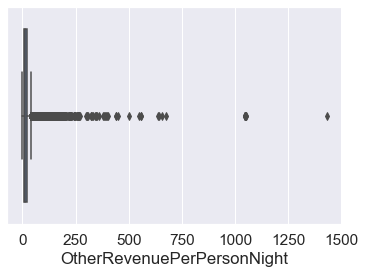

In [19]:
sns.boxplot(X_new["OtherRevenuePerPersonNight"])

In [20]:
X_new[X_new.RoomNights>X_new.PersonsNights]
#Check why this happens w/ teacher

IDMerge Nationality   Age  \
2340   0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...         PRT  45.0   
11593  0x27A6504F8E07DC750D565994E86CB3837146A501E609...         ESP  50.0   
11923  0x28D83B97B0D5B78BCBA1C36FDF79FF276A1E32C9CB5C...         PRT  34.0   
12576  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...         PRT  48.0   
18324  0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...         GRC  52.0   
22334  0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...         PRT  66.0   
26848  0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...         PRT  46.0   
28984  0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...         PRT  49.0   
37749  0x849546932E0ABE7515ECA03635FD1334BBBCC41E0AFD...         BRA  33.0   
44925  0x9E0C31D4C3A418F0B4E063504160A0B33D51C6ABA0A4...         PRT   NaN   
45768  0xA0EA86D350113A03143831212044DE6CE61C2484CB18...         USA  47.0   
46913  0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...         ESP  52.0   
54273  0xBEDD3BDEFDC2F17B6B52D1133594F2A0A60D7D665DEB...         ISR  31.0   
60273  0xD37A405EAA2BF8D23CB44A9AE3C2A7BEC4C5A726BEE2...         PRT  38.0   
64634  0xE2836653FBF39129A11F69F1FC6635CCCD8FA5C7A5E1...         PRT  46.0   
65189  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         ESP   NaN   
66644  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         PRT   NaN   
67178  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         PRT   NaN   
73164  0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...         PRT   NaN   
75393  0xFF1985F366C218F0D7D8280480B6B8AD82CAF6092799...         HRV  43.0   

       DaysSinceCreation                                           NameHash  \
2340                1288  0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...   
11593                736  0x53FB0EB1CE1FD50424F79500C54F8149081D5A3D82F6...   
11923                489  0xFB5F026540ECB47362289BB2507D92BED41D80F632F6...   
12576               1323  0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   
18324                901  0x04F37DBBE0138585CD31BC820E2C780F992915176507...   
22334               1189  0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...   
26848                466  0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...   
28984               1112  0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...   
37749                319  0x3CBB385BBFE0BCBAC87A0F4FE0BFA648DE33905384F4...   
44925                426  0x27749A514C58DA6E2F5544303DD02E378631187B08EF...   
45768               1057  0x82FDEEE5403B80470AABEC952A25DB7D37BEF253BD5C...   
46913                929  0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...   
54273                155  0x5015AE870F1DEECA791D3744CD4ED3CAA95B22C43A5B...   
60273                905  0x257B8DC0708BF75D2A3869648C15B36317B272A1D69B...   
64634                560  0x4FC57FA3A9C4A4096E55BFD5AACE40D3627748CB65E4...   
65189                377  0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...   
66644                625  0xA54BF56198FA66C8414FE1AEB3680DC262B8EE9ACC21...   
67178                103  0xD9A501DB0F0303E3FD9B2FCD27B28411ACE0486F77C0...   
73164               1315  0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...   
75393                892  0xF2A1083BA0F2D0B18B86816CD820DAD61C3818A4A828...   

       AverageLeadTime  LodgingRevenue  OtherRevenue  BookingsCanceled  \
2340         75.000000          138.00         38.50                 0   
11593        15.250000         1931.00        133.00                 0   
11923         0.000000          459.00         42.00                 0   
12576        34.066667        11740.65       3066.50                 5   
18324         7.000000         3066.00        347.30                 0   
22334        38.000000         1239.00        230.00                 4   
26848         3.000000          269.00          7.00                 0   
28984         0.000000          858.15        114.00                 0   
37749         0.000000          524.87        242.50                 0   
44925     

In [21]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [22]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
#X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights
X_new["AvgNights"] = X_new.RoomNights / X_new.BookingsCheckedIn
X_new["GroupSize"] = round(X_new.PersonsNights / X_new.BookingsCheckedIn / X_new.AvgNights,0)

In [23]:
#Age Binning

X_new["AgeBinned"] = X_new.Age.apply(lambda x: '0-24' if x >= 0 and x <=24 else ('25-44' if x>=25 and x<=44 else ('45-64' if x>=45 and x<=64 else '65+')))
X_new.AgeBinned.value_counts()


45-64    31613
25-44    26481
65+      11025
0-24      3799
Name: AgeBinned, dtype: int64

In [24]:
#AvgNights binning
#1-2 Short Stay
#3-4 Medium
#5+ Long

X_new["AvgNightsBinning"] = X_new.AvgNights.apply(lambda x: '1-2' if x>=0 and x<=2.5 else ('3-4' if x>2.5 and x<=4.5 else '5+'))
X_new.AvgNightsBinning.value_counts()

3-4    32843
1-2    28748
5+     11327
Name: AvgNightsBinning, dtype: int64

In [25]:
#GroupSize Binning
#1
#2
#3+
X_new["GroupSizeBinned"] = X_new.GroupSize.apply(lambda x: '1' if x ==1  else ('2' if x==2 else '3+'))
X_new.GroupSizeBinned.value_counts()


2     47026
1     15789
3+    10103
Name: GroupSizeBinned, dtype: int64

In [26]:
#AverageLeadTime binning
#0-7
#8-30
#31-120
#121-365
#366+

X_new["LeadTimeBinned"] = X_new.AverageLeadTime.apply(lambda x: '0-7' if x>=0 and x<8 else ('8-30' if x>=8 and x<31 else ('31-120' if x>=31 and x<121 else('121-365' if x>=121 and x<366 else '366+'))))


In [27]:
#DaysSinceCreation binning
#0-60
#60-365
#365-730
#730+

#X_new["DaysSinceCreationBinned"] = X_new.DaysSinceCreation.apply(lambda x: '0-120' if x>=0 and x<=120 else ('121-365' if x>=121 and x<=365 else ('366-730' if x>=366 and x<=730 else'731+')))


In [28]:
#PersonPerRoom
#0-1,5
#1,5-2,5
#2,5 +

#X_new["PersonPerRoomBinned"] = X_new.PersonPerRoom.apply(lambda x: '1' if x <1.5 else ('2' if x>=1.5 and x<2.5 else '3+'))


In [29]:
#'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator','SRNoAlcoholInMiniBar', 'SRQuietRoom'

#Creature SR Location 

X_new["SRLocation"] = X_new["SRHighFloor"] + X_new["SRQuietRoom"]+X_new["SRLowFloor"] + X_new["SRMediumFloor"] + X_new["SRNearElevator"] + X_new["SRAwayFromElevator"]
X_new["SREquipment"] = X_new["SRAccessibleRoom"] + X_new["SRBathtub"] + X_new["SRShower"] + X_new["SRCrib"] + X_new["SRKingSizeBed"] + X_new["SRTwinBed"] + X_new["SRNoAlcoholInMiniBar"]
X_new.SRLocation = X_new.SRLocation.apply(lambda x: 1 if x>=1 else 0)
X_new.SREquipment = X_new.SREquipment.apply(lambda x: 1 if x>=1 else 0)

In [30]:
# Create new nationality feature with continent of nationality  

cc_alpha2 = [pc.country_alpha3_to_country_alpha2(x) if x != "TMP" else  "AQ" for x in X_new["Nationality"].values] 

X_new["Nationality2"] = [pc.country_alpha2_to_continent_code(x) if x not in ["AQ", "PN", "TF", "UM"] else "Undefined" for x in cc_alpha2] 

X_new["Nationality2"] = [X_new.Nationality2[i] if X_new.Nationality[i] not in ["PRT","GBR","DEU","FRA","ESP"] else X_new.Nationality[i]  for i in X_new.index.values] 

X_new["Nationality2"] = X_new["Nationality2"].apply(lambda x: x if x not in ["NA", "SA", "AF", "OC", "AS", "Undefined"] else "ROW") 

X_new["Nationality2"].value_counts() 

EU     19927
ROW    12087
FRA    11271
DEU    10277
GBR     7865
PRT     7081
ESP     4410
Name: Nationality2, dtype: int64

In [31]:
#DistributionChannel

X_new["DistributionChannelNew"] = X_new.DistributionChannel.apply(lambda x: x if x == "Travel Agent/Operator" else "Other")
X_new["DistributionChannelNew"].value_counts()

Travel Agent/Operator    60358
Other                    12560
Name: DistributionChannelNew, dtype: int64

In [51]:
#Bin Price
X_new["PriceBinned"] = X_new.PricePerNight.apply(lambda x: '0-80' if x>=0 and x<80 else ('80-110' if x>=80 and x<110 else ('110-150' if x>=110 and x<150 else '150+')))
X_new.PriceBinned.value_counts()

80-110     21546
110-150    19797
150+       16472
0-80       15103
Name: PriceBinned, dtype: int64

In [52]:
#Feature engineering part2
#OneHotEncode the categorical variables,
categoricals = ["DistributionChannelNew","Nationality2", "PriceBinned","GroupSizeBinned","AgeBinned","LeadTimeBinned", "AvgNightsBinning"]

dummies = pd.get_dummies(X_new[categoricals], prefix_sep='_')
X_new_2 = X_new.merge(dummies, left_index = True, right_index=True )

In [53]:
#Drop unnecessary columns for PCA
X_new_2.drop(["IDMerge", "Nationality","PricePerNight","PriceBinned","OtherRevenuePerPersonNight","DistributionChannelNew","DistributionChannel","GroupSizeBinned","GroupSize","PersonsNights","AvgNights","RoomNights","AvgNightsBinning","BookingsCheckedIn","BookingsNoShowed","BookingsCanceled", "Age",
              "DaysSinceCreation","AgeBinned","LodgingRevenue","OtherRevenue", "LeadTimeBinned", "NameHash","AverageLeadTime",
              "DistributionChannel",'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom','SRMediumFloor', 'SRBathtub', 'SRShower', 
              'SRCrib', 'SRKingSizeBed','SRTwinBed', 'SRNearElevator', "Nationality2",'SRAwayFromElevator',
              'SRNoAlcoholInMiniBar', 'SRQuietRoom'],axis=1, inplace=True)
#Standardize with MinMax
X_model = X_new_2.copy(deep=True)

cols = list(X_model.columns) # save the name of the columns 

X_model_array = X_model.values # returns a numpy array 

min_max_scaler = preprocessing.MinMaxScaler() 

X_model_scaled = min_max_scaler.fit_transform(X_model_array) 

X_model_norm = pd.DataFrame(X_model_scaled, columns=cols) 

In [54]:
#preview normalized df
X_model_norm.head(1).T

0
SRLocation                                    1.0
SREquipment                                   1.0
DistributionChannelNew_Other                  1.0
DistributionChannelNew_Travel Agent/Operator  0.0
Nationality2_DEU                              0.0
Nationality2_ESP                              0.0
Nationality2_EU                               0.0
Nationality2_FRA                              1.0
Nationality2_GBR                              0.0
Nationality2_PRT                              0.0
Nationality2_ROW                              0.0
PriceBinned_0-80                              0.0
PriceBinned_110-150                           0.0
PriceBinned_150+                              1.0
PriceBinned_80-110                            0.0
GroupSizeBinned_1                             0.0
GroupSizeBinned_2                             1.0
GroupSizeBinned_3+                            0.0
AgeBinned_0-24                                0.0
AgeBinned_25-44                               0.0
AgeBinned_45-64                               1.0
AgeBinned_65+                                 0.0
LeadTimeBinned_0-7                            0.0
LeadTimeBinned_121-365                        0.0
LeadTimeBinned_31-120                         1.0
LeadTimeBinned_366+                           0.0
LeadTimeBinned_8-30                           0.0
AvgNightsBinning_1-2                          1.0
AvgNightsBinning_3-4                          0.0
AvgNightsBinning_5+                           0.0

(72918, 2)


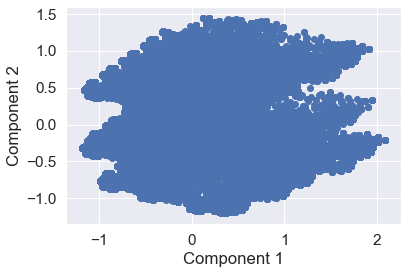

In [55]:
#PCA
pca2 = PCA(n_components = 2)
pca2.fit(X_model_norm)
X_pca2 = pca2.transform(X_model_norm) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2');


In [56]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_model_norm)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_model_norm.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

Component Variance explained  Cumulative variance explained
0           1           0.113765                       0.113765
1           2           0.085839                       0.199604
2           3           0.081622                       0.281227
3           4           0.067361                       0.348588
4           5           0.063886                       0.412474
5           6           0.057475                       0.469949
6           7           0.056132                       0.526081
7           8           0.052596                       0.578677
8           9           0.048651                       0.627328
9          10           0.046750                       0.674078
10         11           0.041749                       0.715827
11         12           0.038845                       0.754672
12         13           0.035309                       0.789981
13         14           0.031848                       0.821828
14         15           0.029509                       0.851337
15         16           0.028802                       0.880139
16         17           0.025976                       0.906116
17         18           0.024388                       0.930504
18         19           0.021281                       0.951784
19         20           0.018197                       0.969981
20         21           0.013530                       0.983512
21         22           0.013325                       0.996837
22         23           0.003163                       1.000000
23         24           0.000000                       1.000000
24         25           0.000000                       1.000000
25         26           0.000000                       1.000000
26         27           0.000000                       1.000000
27         28           0.000000                       1.000000
28         29           0.000000                       1.000000
29         30           0.000000                       1.000000

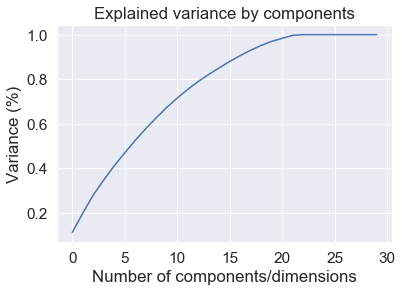

In [57]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

In [58]:
#Modeling Kmeans based on 22 PCAs

pca_reduced = PCA(n_components = 22)
pca_reduced.fit(X_model_norm)
X_pca_reduced = pca_reduced.transform(X_model_norm) 
print(X_pca_reduced.shape)

(72918, 22)


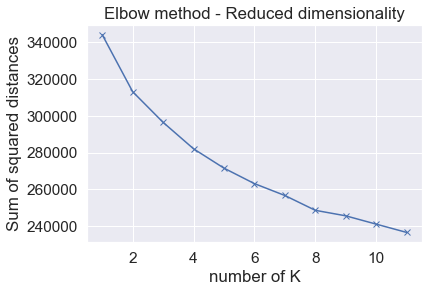

In [59]:
# Select K based on the sum of squared distances 

ssd = [] 

K = range(1,12) 

for k in K: 

    km = KMeans(n_clusters=k, random_state=145) 

    km = km.fit(X_pca_reduced) 

    ssd.append(km.inertia_) 

# Plot results in an elbow graph 

plt.plot(K, ssd, 'bx-') 

plt.xlabel('number of K') 

plt.ylabel('Sum of squared distances') 

plt.title('Elbow method - Reduced dimensionality') 

plt.show() 

   

In [72]:
# Apply the K-Means for K= 6 based on first 2 PC .... #fixed random_state!  6
K= 6

kmeans = KMeans(n_clusters=K, random_state=145
            ) 

kmeans.fit(X_pca_reduced) 

y_kmeans = kmeans.predict(X_pca_reduced) 

X_model["Cluster"]=y_kmeans
#add cluster to x-new

In [73]:
X_model.Cluster.value_counts()

4    20337
5    14113
1    13369
3     9788
0     8317
2     6994
Name: Cluster, dtype: int64

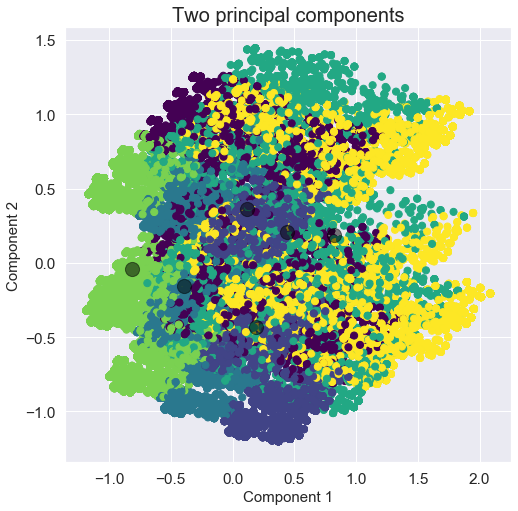

In [74]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [75]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X_model_norm.columns)
wheightsDF

SRLocation   SREquipment  DistributionChannelNew_Other  \
0  -5.141199e-02 -2.067659e-01                      0.221173   
1   5.042963e-03 -1.891687e-01                      0.095238   
2  -1.620913e-02 -1.910842e-01                      0.121926   
3  -6.103997e-02 -2.594206e-01                      0.151280   
4   1.265331e-01  4.280338e-01                     -0.186969   
5   2.286473e-02  1.136530e-02                      0.491970   
6   7.941038e-02  2.704009e-01                      0.089903   
7   4.850769e-03  9.459492e-02                      0.078259   
8  -3.069688e-02 -3.238104e-01                      0.004760   
9   1.959788e-02 -2.110530e-02                     -0.124487   
10  4.461596e-02 -1.081177e-01                     -0.052697   
11  2.486978e-02  3.787179e-01                      0.201807   
12  7.855919e-03  4.785350e-01                      0.105770   
13 -6.653984e-02 -1.870354e-01                     -0.148936   
14  6.152792e-02 -4.319305e-02                     -0.105973   
15  1.973735e-01 -6.027073e-02                     -0.063253   
16 -1.436917e-01  3.707948e-02                      0.006486   
17 -1.896759e-01 -5.150882e-02                     -0.050712   
18  9.251082e-01 -1.341413e-01                      0.024600   
19 -7.644107e-02  1.168459e-02                     -0.046773   
20  1.967348e-04  1.051143e-02                     -0.001676   
21  3.027295e-02 -3.362534e-03                      0.003794   
22  1.019419e-02 -8.498486e-03                      0.003816   
23 -1.421074e-15  3.894066e-16                     -0.008528   
24 -1.967934e-15  2.723331e-16                     -0.005171   
25 -0.000000e+00 -1.389385e-15                      0.013814   
26  0.000000e+00 -5.310166e-17                     -0.193192   
27 -0.000000e+00 -5.669807e-18                      0.110636   
28 -0.000000e+00 -2.386048e-17                     -0.091593   
29 -0.000000e+00  9.743864e-17                     -0.664648   

    DistributionChannelNew_Travel Agent/Operator  Nationality2_DEU  \
0                                      -0.221173         -0.028301   
1                                      -0.095238         -0.001344   
2                                      -0.121926         -0.133495   
3                                      -0.151280          0.060380   
4                                       0.186969         -0.060183   
5                                      -0.491970         -0.118938   
6                                      -0.089903         -0.115590   
7                                      -0.078259          0.014276   
8                                      -0.004760          0.090267   
9                                       0.124487         -0.155301   
10                                      0.052697         -0.034056   
11                                     -0.201807         -0.021573   
12                                     -0.105770         -0.004092   
13                                      0.148936         -0.258665   
14                                      0.105973         -0.214094   
15                                      0.063253          0.565676   
16                                     -0.006486          0.238919   
17                                      0.050712         -0.439279   
18                                     -0.024600         -0.163710   
19                                      0.046773         -0.164364   
20                                      0.001676         -0.163086   
21                                     -0.003794          0.068759   
22                                     -0.003816         -0.041354   
23                                     -0.008528          0.373443   
24                                     -0.005171         -0.055179   
25                                      0.013814          0.011116   
26                                     -0.193192         -0.013533   
27                                      0.110636          0.0

In [76]:
# Study the weights of component 22
comp = abs(wheightsDF.iloc[21]) 
comp = comp.sort_values(ascending=False)
comp

AgeBinned_0-24                                  0.826752
AgeBinned_65+                                   0.372186
AgeBinned_25-44                                 0.234741
Nationality2_ESP                                0.222758
AgeBinned_45-64                                 0.219825
Nationality2_GBR                                0.072715
Nationality2_DEU                                0.068759
Nationality2_ROW                                0.067068
PriceBinned_150+                                0.048144
AvgNightsBinning_5+                             0.044925
PriceBinned_0-80                                0.033475
AvgNightsBinning_1-2                            0.031380
SRLocation                                      0.030273
GroupSizeBinned_1                               0.029953
LeadTimeBinned_366+                             0.024220
Nationality2_FRA                                0.018487
GroupSizeBinned_3+                              0.016202
GroupSizeBinned_2              

In [71]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(X_model[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

0         1         2  \
AgeBinned_0-24                                0.041964  0.093083  0.080507   
AgeBinned_65+                                 0.181056  0.278951  0.136528   
AgeBinned_25-44                               0.383072  0.627966  0.323361   
Nationality2_ESP                              0.074295  0.042952  0.036490   
AgeBinned_45-64                               0.393908  0.000000  0.459604   
Nationality2_GBR                              0.088343  0.147959  0.104516   
Nationality2_DEU                              0.168882  0.114440  0.176925   
Nationality2_ROW                              0.199741  0.153002  0.161395   
PriceBinned_150+                              0.233232  0.182309  0.174447   
AvgNightsBinning_5+                           0.000000  0.000000  1.000000   
PriceBinned_0-80                              0.197779  0.242644  0.245617   
AvgNightsBinning_1-2                          1.000000  0.000000  0.000000   
SRLocation                                    0.119872  0.127254  0.164729   
GroupSizeBinned_1                             0.279388  0.137696  0.117854   
LeadTimeBinned_366+                           0.026222  0.020823  0.001524   
Nationality2_FRA                              0.131957  0.177504  0.179973   
GroupSizeBinned_3+                            0.124554  0.110524  0.154440   
GroupSizeBinned_2                             0.596058  0.751780  0.727706   
AvgNightsBinning_3-4                          0.000000  1.000000  0.000000   
PriceBinned_80-110                            0.292142  0.307962  0.307450   
Nationality2_PRT                              0.127765  0.052919  0.040301   
LeadTimeBinned_8-30                           0.211113  0.171037  0.140244   
LeadTimeBinned_0-7                            0.195906  0.066623  0.075934   
LeadTimeBinned_31-120                         0.315555  0.450937  0.411966   
Nationality2_EU                               0.209017  0.311224  0.300400   
DistributionChannelNew_Other                  0.000000  0.068284  0.089558   
DistributionChannelNew_Travel Agent/Operator  1.000000  0.931716  0.910442   
SREquipment                                   0.560248  0.565081  0.552306   
PriceBinned_110-150                           0.276846  0.267086  0.272485   
LeadTimeBinned_121-365                        0.251204  0.290579  0.370332   

                                                     3         4  
AgeBinned_0-24                                0.000000  0.047527  
AgeBinned_65+                                 0.000000  0.088846  
AgeBinned_25-44                               0.000000  0.418754  
Nationality2_ESP                              0.059275  0.087669  
AgeBinned_45-64                               1.000000  0.444873  
Nationality2_GBR                              0.112319  0.079533  
Nationality2_DEU                              0.152391  0.064333  
Nationality2_ROW                              0.111522  0.192250  
PriceBinned_150+                              0.212754  0.364162  
AvgNightsBinning_5+                           0.000000  0.088953  
PriceBinned_0-80                              0.200145  0.132520  
AvgNightsBinning_1-2                          0.000000  0.676943  
SRLocation                                    0.154565  0.053843  
GroupSizeBinned_1                             0.130435  0.445943  
LeadTimeBinned_366+                           0.004420  0.000000  
Nationality2_FRA                              0.179928  0.101477  
GroupSizeBinned_3+                            0.159275  0.174267  
GroupSizeBinned_2                             0.710290  0.379790  
AvgNightsBinning_3-4                          1.000000  0.234104  
PriceBinned_80-110                            0.301594  0.258510  
Nationality2_PRT                              0.047536  0.240313  
LeadTimeBinned_8-30                           0.154493  0.270606  
LeadTimeBinned_0-7                            0.062101  0.382894  
LeadTimeBinned_31-120     

#### Insights:

**Cluster 0**:  
* Mostly Germans (31%), followed by Rest of the World (22%). Few Portuguese (5%)
* Very old customers (65+)
* Travel mostly in pairs
* Preference for medium stays (3-4 Days)
* Booking mostly in advance (121-365 Days) through Travel Agencies
* Low spenders
* Tend to make requests, mostly related to Equipment


**Cluster 1**: 
* Mostly Europeans, but very few portuguese (4%)
* Mostly middle aged (45-64) customers but also young adults (25-44)
* Travel mostly in pairs but also in bigger groups
* Always stay longer (5+ Days)
* Booking occur mostly more than 30 days before traveling through Travel Agencies
* Moderate spenders
* Tend to make requests, mostly related to Equipment


**Cluster 2**: 
* Mostly Europeans, but very portuguese (5%)
* Middle aged customers (45-64)
* Travel mostly in pairs
* Always have moderate stays (3-4 Days)
* Booking occur mostly more than 30 days before traveling through Travel Agencies
* Moderate spenders
* Tend to make requests, mostly related to Equipment


**Cluster 3**: 
* Biggest Iberian group (24% Portuguese + 10% Spanish)
* Customers aged betwen 25-64
* Travel mostly alone
* Short stays (1-2 days)
* Most spontaneous group (72% with Lead Time <30 Days) through a mix of Travel Agency and other methods.
* Mostly moderate spenders but also contains the higher spenders.
* Very few requests
* Tied to Corporate traveling which also boosts spending


**Cluster 4**: 
* Contains bigger group of Rest of the world (23%) and every other nationality is well balanced
* Customers aged betwen 25-64
* Mostly travel in pairs
* Short stays
* Moderate Booking time (60% between 8 and 120 Days) through Travel Agency
* Above average spenders
* Tend to make requests, mostly related to Equipment


**Cluster 5**: 
* Mostly Europeans and few Portuguese.
* Younger adults (aged between 25-44)
* Usually travel in pairs, but sometimes alone or in groups
* Always moderate stays (3-4 Days)
* Mostly book between 30-120 Days in advance through mostly Travel Agencies, with few exceptions in Corporate customers
* Moderate spenders with some low spenders and some high spenders
* Tend to make requests, mostly related to Equipment
* High Spenders are related to Corporate, which also exists in this group (50% of all Corp.)



In [77]:
X_new["Cl"] = X_model.Cluster
pd.crosstab(X_new.Cl, X_new.DistributionChannel)

DistributionChannel  Corporate  Direct  GDS Systems  Travel Agent/Operator
Cl                                                                        
0                            0      22            0                   8295
1                            0       3            0                  13366
2                            0      50            0                   6944
3                         1118    8478          192                      0
4                            0       0            0                  20337
5                         1020    1294          383                  11416